In [1]:
# import pandas as pd
from datetime import datetime  
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
import pandas as pd

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [23]:
total_data = pd.read_csv(r"Aquifer_Auser.csv")

In [24]:
total_data.to_csv(r"C:\Users\user\4Geeks\Módulos\Módulo22\raw_data_kaggle_series.csv")

In [3]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     8154 non-null   object 
 1   Rainfall_Gallicano                       5295 non-null   float64
 2   Rainfall_Pontetetto                      5295 non-null   float64
 3   Rainfall_Monte_Serra                     5289 non-null   float64
 4   Rainfall_Orentano                        5295 non-null   float64
 5   Rainfall_Borgo_a_Mozzano                 5295 non-null   float64
 6   Rainfall_Piaggione                       4930 non-null   float64
 7   Rainfall_Calavorno                       5295 non-null   float64
 8   Rainfall_Croce_Arcana                    5295 non-null   float64
 9   Rainfall_Tereglio_Coreglia_Antelminelli  5295 non-null   float64
 10  Rainfall_Fabbriche_di_Vallico            5295 no

In [4]:
selected_data=total_data[['Date','Temperature_Orentano']]
selected_data

,Date,Temperature_Orentano
0,05/03/1998,0.00
1,06/03/1998,0.00
2,07/03/1998,0.00
3,08/03/1998,0.00
4,09/03/1998,0.00
...,...,...
8149,26/06/2020,23.20
8150,27/06/2020,23.60
8151,28/06/2020,24.00
8152,29/06/2020,22.40


In [5]:
                                    
total_data['Date'] = pd.to_datetime(total_data['Date'] , format='%d/%m/%Y')                                    
total_data['Date']

0      1998-03-05
1      1998-03-06
2      1998-03-07
3      1998-03-08
4      1998-03-09
          ...    
8149   2020-06-26
8150   2020-06-27
8151   2020-06-28
8152   2020-06-29
8153   2020-06-30
Name: Date, Length: 8154, dtype: datetime64[ns]

In [6]:
selected_data = selected_data.set_index("Date")

In [7]:
selected_data

,Temperature_Orentano
Date,
05/03/1998,0.00
06/03/1998,0.00
07/03/1998,0.00
08/03/1998,0.00
09/03/1998,0.00
...,...
26/06/2020,23.20
27/06/2020,23.60
28/06/2020,24.00


In [25]:
total_data.to_csv(r"C:\Users\user\4Geeks\Módulos\Módulo22\sel_data_kaggle_series.csv")

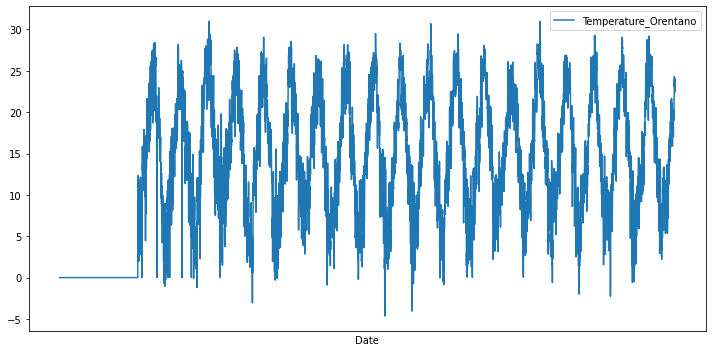

In [8]:


fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = selected_data)

plt.xticks([])
plt.tight_layout()

plt.show()

In [9]:
decomposition = seasonal_decompose(selected_data, period = 12)
decomposition

## Tendencia

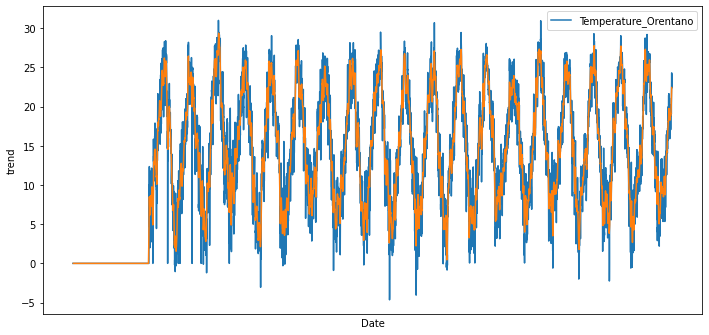

In [10]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = selected_data)
sns.lineplot(data = trend)

plt.tight_layout()
plt.xticks([])

plt.show()

Se observa que no hay una tendencia clara sino que oscila mucho

## Estacionalidad

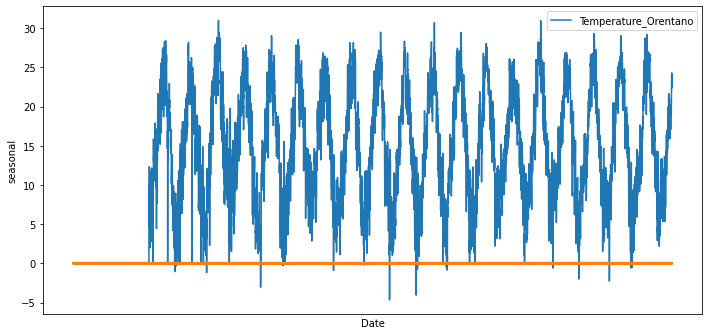

In [11]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = selected_data)
sns.lineplot(data = seasonal)

plt.tight_layout()
plt.xticks([])

plt.show()

In [12]:


def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(selected_data)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   -4.403276
p-value                           0.000293
#Lags Used                       29.000000
Number of Observations Used    8124.000000
Critical Value (1%)              -3.431155
Critical Value (5%)              -2.861896
Critical Value (10%)             -2.566959
dtype: float64

$H_0$: La serie no es estacionaria  
$H_1$: La serie es estacionaria

Como el valor p es menor a 0.05, esto significa que nuestra hipótesis nula será rechazada y tomaremos esta serie como  estacionaria

## Análisis de la variabilidad

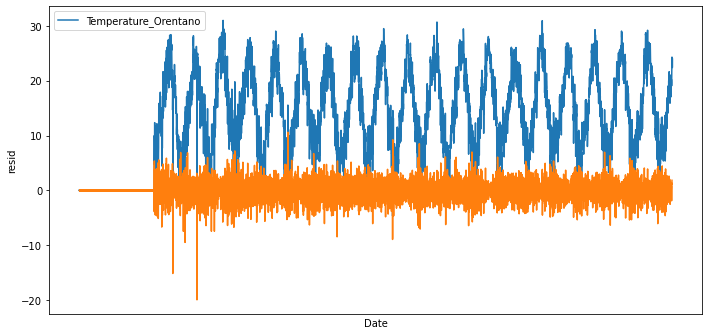

In [13]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = selected_data)
sns.lineplot(data = residual)

plt.tight_layout()
plt.xticks([])

plt.show()

No se observa apenas variabilidad

## Entrenamiento del modelo

In [14]:
# import pmdarima
model = auto_arima(selected_data, seasonal = True, trace = True, m = 12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=33260.881, Time=32.22 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=33975.601, Time=0.31 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=33793.872, Time=2.45 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=33716.267, Time=8.35 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=33973.620, Time=1.15 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=33249.046, Time=33.48 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=33246.462, Time=11.04 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=33258.454, Time=18.75 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=33257.446, Time=2.94 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=33257.343, Time=2.82 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=33261.032, Time=3.39 sec
 ARIMA(2,1,3)(0,0,0)[12] intercept   : AIC=33261.138, Time=2.90 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=33259.218, Time=3.08 sec
 ARIMA(1,1,3)(0,0,0)[12] intercept   : AIC=33259.022, Time=3.70 sec
 

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8154
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -16583.335
Date:                Fri, 29 Dec 2023   AIC                          33176.670
Time:                        17:18:58   BIC                          33211.700
Sample:                             0   HQIC                         33188.649
                               - 8154                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6909      0.009    184.676      0.000       1.673       1.709
ar.L2         -0.6958      0.009    -77.412      0.000      -0.713      -0.678
ma.L1         -1.9234      0.006   -340.517      0.000      -1.934      -1.912
ma.L2          0.9270      0.006    166.221      0.000       0.916       0.938
sigma2         3.4272      0.029    118.658      0.000       3.371       3.484
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):             10075.09
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                            -0.45
Prob(H) (two-sided):                  0.27   Kurtosis:                         8.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
forecast = model.predict(30)
forecast

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


8154    23.504167
8155    23.215113
8156    23.036589
8157    22.935864
8158    22.889775
8159    22.881933
8160    22.900744
8161    22.938008
8162    22.987928
8163    23.046405
8164    23.110546
8165    23.178310
8166    23.248259
8167    23.319380
8168    23.390963
8169    23.462512
8170    23.533682
8171    23.604235
8172    23.674007
8173    23.742890
8174    23.810812
8175    23.877727
8176    23.943610
8177    24.008446
8178    24.072233
8179    24.134971
8180    24.196670
8181    24.257337
8182    24.316986
8183    24.375630
dtype: float64

In [18]:
import pandas as pd
from pmdarima import auto_arima

# Supongamos que tienes un DataFrame llamado 'data' con una columna de fechas 'date' y una columna de valores 'value'
# Ajusta un modelo AutoARIMA


# Obtén las fechas originales
original_dates = selected_data.index

future_dates = pd.date_range(start=original_dates[-1], periods=30, freq='D')  # Ajusta la frecuencia según tus datos

# Realiza las predicciones
forecast = model.predict(n_periods=30)

# Combina las fechas futuras con las predicciones
forecast_with_dates = pd.DataFrame({'forecast': forecast.values}, index=future_dates)

print(forecast_with_dates)


             forecast
2020-06-30  23.504167
2020-07-01  23.215113
2020-07-02  23.036589
2020-07-03  22.935864
2020-07-04  22.889775
2020-07-05  22.881933
2020-07-06  22.900744
2020-07-07  22.938008
2020-07-08  22.987928
2020-07-09  23.046405
2020-07-10  23.110546
2020-07-11  23.178310
2020-07-12  23.248259
2020-07-13  23.319380
2020-07-14  23.390963
2020-07-15  23.462512
2020-07-16  23.533682
2020-07-17  23.604235
2020-07-18  23.674007
2020-07-19  23.742890
2020-07-20  23.810812
2020-07-21  23.877727
2020-07-22  23.943610
2020-07-23  24.008446
2020-07-24  24.072233
2020-07-25  24.134971
2020-07-26  24.196670
2020-07-27  24.257337
2020-07-28  24.316986
2020-07-29  24.375630


C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: UserWarning: Parsing '30/06/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [19]:
# Convierte el índice al formato deseado
forecast_with_dates.index = forecast_with_dates.index.strftime("%d/%m/%Y")

# Imprime el DataFrame con las fechas convertidas
forecast_with_dates


,forecast
30/06/2020,23.504167
01/07/2020,23.215113
02/07/2020,23.036589
03/07/2020,22.935864
04/07/2020,22.889775
05/07/2020,22.881933
06/07/2020,22.900744
07/07/2020,22.938008
08/07/2020,22.987928
09/07/2020,23.046405


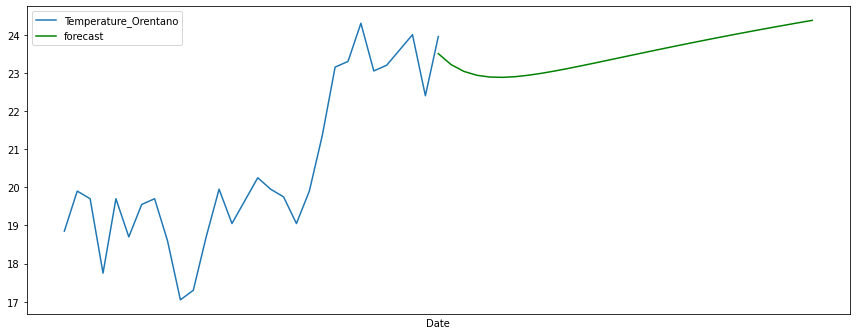

In [20]:

fig, axis = plt.subplots(figsize = (12, 5))

sns.lineplot(data = selected_data.tail(30))
sns.lineplot(data = forecast_with_dates, palette=['green'])

plt.tight_layout()
plt.xticks([])

plt.show()

In [21]:
from pickle import dump, load

In [22]:
dump(model, open(r"C:\Users\user\4Geeks\Módulos\Módulo22\kaggle_series_model.pkl", "wb"))

In [2]:
!git add C:\Users\user\4Geeks\Módulos\Módulo22\Kaggle-time-series\data\raw\Aquifer_Auser.csv

In [3]:
!git add C:\Users\user\4Geeks\Módulos\Módulo22\Kaggle-time-series\data\processed\sel_data_kaggle_series.csv

In [ ]:
!git add C:\Users\user\4Geeks\Módulos\Módulo22\time-series\models\time_series_model.pkl